## Notebook to analyse the iou in function of the confidence in the test cohort

In [1]:
import os
import sys
import numpy as np
sys.path.append('/home/co-ripa1/rds/hpc-work/scripts/meld_classifier')
import h5py
import matplotlib_surface_plotting as msp
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import nibabel as nb
import meld_graph.experiment
from meld_classifier.paths import BASE_PATH
from meld_classifier.meld_cohort import MeldCohort,MeldSubject
import ptitprince as pt
import seaborn as sns


Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350
Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data


### Get IOU and confidence

In [3]:
from meld_graph.dataset import GraphDataset
from meld_graph.evaluation import Evaluator

In [4]:
dataset = 'test'  # "test" or "H101"

In [15]:
# load experiment
model_graph = '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-10-30_LVHZ_dcp/s_0/fold_all'
exp = meld_graph.experiment.Experiment.from_folder(model_graph)
exp.data_parameters["augment_data"] = {}

#load trainval dataset
split = "test"

cohort = MeldCohort(
        hdf5_file_root=exp.data_parameters["hdf5_file_root"],
        dataset=exp.data_parameters["dataset"],
    )

features = exp.data_parameters["features"]

# get only test patients
with h5py.File(os.path.join(model_graph, 'results_best_model', 'predictions.hdf5'), "r") as f:
    subjects = list(f.keys())

subjects = [subject for subject in subjects if '_FCD_' in subject]
print(len(subjects))
# subjects = subjects[0:20]
dataset = GraphDataset(subjects, cohort, exp.data_parameters, mode="test")
save_prediction_suffix=""

# create evaluator
eva = Evaluator(
    experiment=exp,
    checkpoint_path=model_graph,
    make_images=False,
    dataset=dataset,
    save_dir=None,
    cohort=cohort,
    subject_ids=subjects,
    mode="test",
    thresh_and_clust=True,
)

eva.dropout_suffix = ""

Initialised Experiment 23-10-30_LVHZ_dcp/s_0


/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-10-30_LVHZ_dcp/s_0/fold_all
260


Loading and preprocessing test data


MELD2_H7_3T_FCD_001


Z-scoring data for MELD2_H7_3T_FCD_001


MELD2_H7_3T_FCD_004


Z-scoring data for MELD2_H7_3T_FCD_004


MELD2_H7_3T_FCD_005


Z-scoring data for MELD2_H7_3T_FCD_005


MELD2_H7_3T_FCD_009


Z-scoring data for MELD2_H7_3T_FCD_009


MELD_H10_3T_FCD_0002


Z-scoring data for MELD_H10_3T_FCD_0002


MELD_H10_3T_FCD_0009


Z-scoring data for MELD_H10_3T_FCD_0009


MELD_H10_3T_FCD_0013


Z-scoring data for MELD_H10_3T_FCD_0013


MELD_H10_3T_FCD_0014


Z-scoring data for MELD_H10_3T_FCD_0014


MELD_H10_3T_FCD_0016


Z-scoring data for MELD_H10_3T_FCD_0016


MELD_H11_3T_FCD_0002


Z-scoring data for MELD_H11_3T_FCD_0002
Z-scoring data for MELD_H11_3T_FCD_0006


MELD_H11_3T_FCD_0006
MELD_H11_3T_FCD_0007


Z-scoring data for MELD_H11_3T_FCD_0007


MELD_H11_3T_FCD_0009


Z-scoring data for MELD_H11_3T_FCD_0009


MELD_H11_3T_FCD_0010


Z-scoring data for MELD_H11_3T_FCD_0010


MELD_H11_3T_FCD_0011


Z-scoring data for MELD_H11_3T_FCD_0011


MELD_H11_3T_FCD_0015


Z-scoring data for MELD_H11_3T_FCD_0015
Z-scoring data for MELD_H11_3T_FCD_0019


MELD_H11_3T_FCD_0019
MELD_H11_3T_FCD_0020


Z-scoring data for MELD_H11_3T_FCD_0020
Z-scoring data for MELD_H11_3T_FCD_0025


MELD_H11_3T_FCD_0025
MELD_H11_3T_FCD_0027


Z-scoring data for MELD_H11_3T_FCD_0027


MELD_H11_3T_FCD_0028


Z-scoring data for MELD_H11_3T_FCD_0028
Z-scoring data for MELD_H11_3T_FCD_0030


MELD_H11_3T_FCD_0030
MELD_H11_3T_FCD_0031


Z-scoring data for MELD_H11_3T_FCD_0031


MELD_H11_3T_FCD_0040


Z-scoring data for MELD_H11_3T_FCD_0040
Z-scoring data for MELD_H11_3T_FCD_0041


MELD_H11_3T_FCD_0041
MELD_H11_3T_FCD_0042


Z-scoring data for MELD_H11_3T_FCD_0042


MELD_H11_3T_FCD_0044


Z-scoring data for MELD_H11_3T_FCD_0044
Z-scoring data for MELD_H11_3T_FCD_0045


MELD_H11_3T_FCD_0045
MELD_H12_3T_FCD_0003


Z-scoring data for MELD_H12_3T_FCD_0003


MELD_H12_3T_FCD_0006


Z-scoring data for MELD_H12_3T_FCD_0006


MELD_H12_3T_FCD_0007


Z-scoring data for MELD_H12_3T_FCD_0007
Z-scoring data for MELD_H12_3T_FCD_0009


MELD_H12_3T_FCD_0009
MELD_H12_3T_FCD_0011


Z-scoring data for MELD_H12_3T_FCD_0011


MELD_H12_3T_FCD_0014


Z-scoring data for MELD_H12_3T_FCD_0014


MELD_H12_3T_FCD_0016


Z-scoring data for MELD_H12_3T_FCD_0016


MELD_H12_3T_FCD_0018


Z-scoring data for MELD_H12_3T_FCD_0018


MELD_H12_3T_FCD_0030


Z-scoring data for MELD_H12_3T_FCD_0030


MELD_H14_3T_FCD_0009


Z-scoring data for MELD_H14_3T_FCD_0009


MELD_H14_3T_FCD_0011


Z-scoring data for MELD_H14_3T_FCD_0011
Z-scoring data for MELD_H14_3T_FCD_0013


MELD_H14_3T_FCD_0013
MELD_H14_3T_FCD_0016


Z-scoring data for MELD_H14_3T_FCD_0016


MELD_H14_3T_FCD_0017


Z-scoring data for MELD_H14_3T_FCD_0017


MELD_H14_3T_FCD_0021


Z-scoring data for MELD_H14_3T_FCD_0021


MELD_H14_3T_FCD_0022


Z-scoring data for MELD_H14_3T_FCD_0022
Z-scoring data for MELD_H14_3T_FCD_0023


MELD_H14_3T_FCD_0023
MELD_H14_3T_FCD_0024


Z-scoring data for MELD_H14_3T_FCD_0024


MELD_H14_3T_FCD_0025


Z-scoring data for MELD_H14_3T_FCD_0025
Z-scoring data for MELD_H14_3T_FCD_0026


MELD_H14_3T_FCD_0026
MELD_H14_3T_FCD_0029


Z-scoring data for MELD_H14_3T_FCD_0029


MELD_H14_3T_FCD_0030


Z-scoring data for MELD_H14_3T_FCD_0030


MELD_H14_3T_FCD_0031


Z-scoring data for MELD_H14_3T_FCD_0031


MELD_H14_3T_FCD_0034


Z-scoring data for MELD_H14_3T_FCD_0034


MELD_H14_3T_FCD_0035


Z-scoring data for MELD_H14_3T_FCD_0035


MELD_H14_3T_FCD_0037


Z-scoring data for MELD_H14_3T_FCD_0037


MELD_H14_3T_FCD_0039


Z-scoring data for MELD_H14_3T_FCD_0039


MELD_H14_3T_FCD_0040


Z-scoring data for MELD_H14_3T_FCD_0040


MELD_H14_3T_FCD_0042


Z-scoring data for MELD_H14_3T_FCD_0042


MELD_H15_3T_FCD_0003


Z-scoring data for MELD_H15_3T_FCD_0003


MELD_H15_3T_FCD_0004


Z-scoring data for MELD_H15_3T_FCD_0004


MELD_H15_3T_FCD_0007


Z-scoring data for MELD_H15_3T_FCD_0007
Z-scoring data for MELD_H15_3T_FCD_0008


MELD_H15_3T_FCD_0008
MELD_H15_3T_FCD_0010


Z-scoring data for MELD_H15_3T_FCD_0010


MELD_H16_3T_FCD_001


Z-scoring data for MELD_H16_3T_FCD_001
Z-scoring data for MELD_H16_3T_FCD_003


MELD_H16_3T_FCD_003
MELD_H16_3T_FCD_004


Z-scoring data for MELD_H16_3T_FCD_004


MELD_H16_3T_FCD_005


Z-scoring data for MELD_H16_3T_FCD_005
Z-scoring data for MELD_H16_3T_FCD_008


MELD_H16_3T_FCD_008
MELD_H16_3T_FCD_010


Z-scoring data for MELD_H16_3T_FCD_010
Z-scoring data for MELD_H16_3T_FCD_013


MELD_H16_3T_FCD_013


Z-scoring data for MELD_H16_3T_FCD_015


MELD_H16_3T_FCD_015
MELD_H16_3T_FCD_016


Z-scoring data for MELD_H16_3T_FCD_016
Z-scoring data for MELD_H16_3T_FCD_017


MELD_H16_3T_FCD_017
MELD_H16_3T_FCD_022


Z-scoring data for MELD_H16_3T_FCD_022


MELD_H16_3T_FCD_023


Z-scoring data for MELD_H16_3T_FCD_023
Z-scoring data for MELD_H16_3T_FCD_026


MELD_H16_3T_FCD_026
MELD_H16_3T_FCD_045


Z-scoring data for MELD_H16_3T_FCD_045
Z-scoring data for MELD_H16_3T_FCD_048


MELD_H16_3T_FCD_048
MELD_H17_15T_FCD_0011


Z-scoring data for MELD_H17_15T_FCD_0011


MELD_H17_15T_FCD_0017


Z-scoring data for MELD_H17_15T_FCD_0017


MELD_H17_15T_FCD_0102


Z-scoring data for MELD_H17_15T_FCD_0102


MELD_H17_15T_FCD_0104


Z-scoring data for MELD_H17_15T_FCD_0104


MELD_H17_15T_FCD_0139


Z-scoring data for MELD_H17_15T_FCD_0139


MELD_H17_3T_FCD_0001


Z-scoring data for MELD_H17_3T_FCD_0001


MELD_H17_3T_FCD_0014


Z-scoring data for MELD_H17_3T_FCD_0014


MELD_H17_3T_FCD_0018


Z-scoring data for MELD_H17_3T_FCD_0018


MELD_H17_3T_FCD_0022


Z-scoring data for MELD_H17_3T_FCD_0022


MELD_H17_3T_FCD_0039


Z-scoring data for MELD_H17_3T_FCD_0039


MELD_H17_3T_FCD_0043


Z-scoring data for MELD_H17_3T_FCD_0043


MELD_H17_3T_FCD_0044


Z-scoring data for MELD_H17_3T_FCD_0044


MELD_H17_3T_FCD_0053


Z-scoring data for MELD_H17_3T_FCD_0053


MELD_H17_3T_FCD_0054


Z-scoring data for MELD_H17_3T_FCD_0054


MELD_H17_3T_FCD_0057


Z-scoring data for MELD_H17_3T_FCD_0057


MELD_H17_3T_FCD_0061


Z-scoring data for MELD_H17_3T_FCD_0061


MELD_H17_3T_FCD_0067


Z-scoring data for MELD_H17_3T_FCD_0067
Z-scoring data for MELD_H17_3T_FCD_0070


MELD_H17_3T_FCD_0070
MELD_H17_3T_FCD_0076


Z-scoring data for MELD_H17_3T_FCD_0076
Z-scoring data for MELD_H17_3T_FCD_0079


MELD_H17_3T_FCD_0079
MELD_H17_3T_FCD_0084


Z-scoring data for MELD_H17_3T_FCD_0084


MELD_H17_3T_FCD_0086


Z-scoring data for MELD_H17_3T_FCD_0086


MELD_H17_3T_FCD_0090


Z-scoring data for MELD_H17_3T_FCD_0090


MELD_H17_3T_FCD_0091


Z-scoring data for MELD_H17_3T_FCD_0091


MELD_H17_3T_FCD_0094


Z-scoring data for MELD_H17_3T_FCD_0094


MELD_H17_3T_FCD_0098


Z-scoring data for MELD_H17_3T_FCD_0098


MELD_H17_3T_FCD_0112


Z-scoring data for MELD_H17_3T_FCD_0112


MELD_H17_3T_FCD_0116


Z-scoring data for MELD_H17_3T_FCD_0116


MELD_H17_3T_FCD_0120


Z-scoring data for MELD_H17_3T_FCD_0120


MELD_H17_3T_FCD_0127


Z-scoring data for MELD_H17_3T_FCD_0127


MELD_H17_3T_FCD_0135


Z-scoring data for MELD_H17_3T_FCD_0135


MELD_H17_3T_FCD_0143


Z-scoring data for MELD_H17_3T_FCD_0143


MELD_H18_3T_FCD_0001


Z-scoring data for MELD_H18_3T_FCD_0001
Z-scoring data for MELD_H18_3T_FCD_0006


MELD_H18_3T_FCD_0006
MELD_H18_3T_FCD_0008


Z-scoring data for MELD_H18_3T_FCD_0008


MELD_H18_3T_FCD_0009


Z-scoring data for MELD_H18_3T_FCD_0009


MELD_H18_3T_FCD_0101


Z-scoring data for MELD_H18_3T_FCD_0101


MELD_H18_3T_FCD_0109


Z-scoring data for MELD_H18_3T_FCD_0109
Z-scoring data for MELD_H18_3T_FCD_0115


MELD_H18_3T_FCD_0115
MELD_H18_3T_FCD_0124


Z-scoring data for MELD_H18_3T_FCD_0124


MELD_H21_15T_FCD_0036


Z-scoring data for MELD_H21_15T_FCD_0036


MELD_H21_15T_FCD_0038


Z-scoring data for MELD_H21_15T_FCD_0038


MELD_H21_15T_FCD_0040


Z-scoring data for MELD_H21_15T_FCD_0040


MELD_H21_15T_FCD_0043


Z-scoring data for MELD_H21_15T_FCD_0043


MELD_H21_15T_FCD_0047


Z-scoring data for MELD_H21_15T_FCD_0047


MELD_H21_15T_FCD_0049


Z-scoring data for MELD_H21_15T_FCD_0049


MELD_H21_15T_FCD_0050


Z-scoring data for MELD_H21_15T_FCD_0050


MELD_H21_15T_FCD_0051


Z-scoring data for MELD_H21_15T_FCD_0051


MELD_H21_15T_FCD_0052


Z-scoring data for MELD_H21_15T_FCD_0052


MELD_H21_3T_FCD_0007


Z-scoring data for MELD_H21_3T_FCD_0007


MELD_H21_3T_FCD_0008


Z-scoring data for MELD_H21_3T_FCD_0008


MELD_H21_3T_FCD_0009


Z-scoring data for MELD_H21_3T_FCD_0009


MELD_H21_3T_FCD_0013


Z-scoring data for MELD_H21_3T_FCD_0013


MELD_H21_3T_FCD_0016


Z-scoring data for MELD_H21_3T_FCD_0016


MELD_H21_3T_FCD_0017


Z-scoring data for MELD_H21_3T_FCD_0017


MELD_H21_3T_FCD_0018


Z-scoring data for MELD_H21_3T_FCD_0018


MELD_H21_3T_FCD_0030


Z-scoring data for MELD_H21_3T_FCD_0030


MELD_H21_3T_FCD_0033


Z-scoring data for MELD_H21_3T_FCD_0033


MELD_H21_3T_FCD_0034


Z-scoring data for MELD_H21_3T_FCD_0034


MELD_H21_3T_FCD_0035


Z-scoring data for MELD_H21_3T_FCD_0035


MELD_H21_3T_FCD_0046


Z-scoring data for MELD_H21_3T_FCD_0046


MELD_H21_3T_FCD_0048


Z-scoring data for MELD_H21_3T_FCD_0048


MELD_H23_15T_FCD_0003


Z-scoring data for MELD_H23_15T_FCD_0003


MELD_H23_15T_FCD_0004


Z-scoring data for MELD_H23_15T_FCD_0004


MELD_H23_15T_FCD_0005


Z-scoring data for MELD_H23_15T_FCD_0005


MELD_H23_15T_FCD_0011


Z-scoring data for MELD_H23_15T_FCD_0011


MELD_H23_15T_FCD_0013


Z-scoring data for MELD_H23_15T_FCD_0013


MELD_H23_15T_FCD_0015


Z-scoring data for MELD_H23_15T_FCD_0015


MELD_H23_15T_FCD_0020


Z-scoring data for MELD_H23_15T_FCD_0020


MELD_H23_15T_FCD_0021


Z-scoring data for MELD_H23_15T_FCD_0021


MELD_H23_15T_FCD_0022


Z-scoring data for MELD_H23_15T_FCD_0022


MELD_H23_15T_FCD_0023


Z-scoring data for MELD_H23_15T_FCD_0023


MELD_H23_15T_FCD_0025


Z-scoring data for MELD_H23_15T_FCD_0025


MELD_H23_15T_FCD_0027


Z-scoring data for MELD_H23_15T_FCD_0027


MELD_H23_15T_FCD_0030


Z-scoring data for MELD_H23_15T_FCD_0030


MELD_H23_15T_FCD_0031


Z-scoring data for MELD_H23_15T_FCD_0031


MELD_H23_15T_FCD_0032


Z-scoring data for MELD_H23_15T_FCD_0032


MELD_H24_3T_FCD_0003


Z-scoring data for MELD_H24_3T_FCD_0003


MELD_H24_3T_FCD_0005


Z-scoring data for MELD_H24_3T_FCD_0005


MELD_H24_3T_FCD_0006


Z-scoring data for MELD_H24_3T_FCD_0006


MELD_H24_3T_FCD_0007


Z-scoring data for MELD_H24_3T_FCD_0007


MELD_H24_3T_FCD_0011


Z-scoring data for MELD_H24_3T_FCD_0011


MELD_H24_3T_FCD_0012


Z-scoring data for MELD_H24_3T_FCD_0012


MELD_H24_3T_FCD_0013


Z-scoring data for MELD_H24_3T_FCD_0013


MELD_H24_3T_FCD_0015


Z-scoring data for MELD_H24_3T_FCD_0015


MELD_H24_3T_FCD_0025


Z-scoring data for MELD_H24_3T_FCD_0025


MELD_H24_3T_FCD_0026


Z-scoring data for MELD_H24_3T_FCD_0026


MELD_H24_3T_FCD_0029


Z-scoring data for MELD_H24_3T_FCD_0029


MELD_H24_3T_FCD_0030


Z-scoring data for MELD_H24_3T_FCD_0030


MELD_H24_3T_FCD_0036


Z-scoring data for MELD_H24_3T_FCD_0036


MELD_H24_3T_FCD_0037


Z-scoring data for MELD_H24_3T_FCD_0037


MELD_H24_3T_FCD_0040


Z-scoring data for MELD_H24_3T_FCD_0040


MELD_H24_3T_FCD_0041


Z-scoring data for MELD_H24_3T_FCD_0041


MELD_H26_15T_FCD_0001


Z-scoring data for MELD_H26_15T_FCD_0001


MELD_H26_15T_FCD_0005


Z-scoring data for MELD_H26_15T_FCD_0005


MELD_H26_15T_FCD_0009


Z-scoring data for MELD_H26_15T_FCD_0009


MELD_H26_15T_FCD_0010


Z-scoring data for MELD_H26_15T_FCD_0010


MELD_H26_3T_FCD_0002


Z-scoring data for MELD_H26_3T_FCD_0002


MELD_H26_3T_FCD_0004


Z-scoring data for MELD_H26_3T_FCD_0004


MELD_H26_3T_FCD_0007


Z-scoring data for MELD_H26_3T_FCD_0007


MELD_H2_15T_FCD_0001


Z-scoring data for MELD_H2_15T_FCD_0001
Z-scoring data for MELD_H2_15T_FCD_0003


MELD_H2_15T_FCD_0003
MELD_H2_15T_FCD_0005


Z-scoring data for MELD_H2_15T_FCD_0005


MELD_H2_15T_FCD_0007


Z-scoring data for MELD_H2_15T_FCD_0007
Z-scoring data for MELD_H2_15T_FCD_0008


MELD_H2_15T_FCD_0008
MELD_H2_15T_FCD_0009


Z-scoring data for MELD_H2_15T_FCD_0009
Z-scoring data for MELD_H2_15T_FCD_0014


MELD_H2_15T_FCD_0014


Z-scoring data for MELD_H2_15T_FCD_0015


MELD_H2_15T_FCD_0015


Z-scoring data for MELD_H2_15T_FCD_0016


MELD_H2_15T_FCD_0016
MELD_H2_15T_FCD_0020


Z-scoring data for MELD_H2_15T_FCD_0020


MELD_H2_15T_FCD_0023


Z-scoring data for MELD_H2_15T_FCD_0023


MELD_H2_15T_FCD_0028


Z-scoring data for MELD_H2_15T_FCD_0028
Z-scoring data for MELD_H2_15T_FCD_0029


MELD_H2_15T_FCD_0029
MELD_H2_15T_FCD_0030


Z-scoring data for MELD_H2_15T_FCD_0030


MELD_H2_3T_FCD_0003


Z-scoring data for MELD_H2_3T_FCD_0003


MELD_H2_3T_FCD_0004


Z-scoring data for MELD_H2_3T_FCD_0004


MELD_H2_3T_FCD_0005


Z-scoring data for MELD_H2_3T_FCD_0005
Z-scoring data for MELD_H2_3T_FCD_0006


MELD_H2_3T_FCD_0006
MELD_H2_3T_FCD_0008


Z-scoring data for MELD_H2_3T_FCD_0008


MELD_H2_3T_FCD_0014


Z-scoring data for MELD_H2_3T_FCD_0014


MELD_H2_3T_FCD_0016


Z-scoring data for MELD_H2_3T_FCD_0016


MELD_H2_3T_FCD_0017


Z-scoring data for MELD_H2_3T_FCD_0017
Z-scoring data for MELD_H2_3T_FCD_0018


MELD_H2_3T_FCD_0018
MELD_H3_3T_FCD_0002


Z-scoring data for MELD_H3_3T_FCD_0002
Z-scoring data for MELD_H3_3T_FCD_0003


MELD_H3_3T_FCD_0003
MELD_H3_3T_FCD_0004


Z-scoring data for MELD_H3_3T_FCD_0004


MELD_H3_3T_FCD_0005


Z-scoring data for MELD_H3_3T_FCD_0005


MELD_H3_3T_FCD_0007


Z-scoring data for MELD_H3_3T_FCD_0007
Z-scoring data for MELD_H3_3T_FCD_0008


MELD_H3_3T_FCD_0008
MELD_H3_3T_FCD_0009


Z-scoring data for MELD_H3_3T_FCD_0009


MELD_H3_3T_FCD_0010


Z-scoring data for MELD_H3_3T_FCD_0010


MELD_H3_3T_FCD_0012


Z-scoring data for MELD_H3_3T_FCD_0012


MELD_H3_3T_FCD_0014


Z-scoring data for MELD_H3_3T_FCD_0014


MELD_H3_3T_FCD_0015


Z-scoring data for MELD_H3_3T_FCD_0015


MELD_H3_3T_FCD_0016


Z-scoring data for MELD_H3_3T_FCD_0016


MELD_H3_3T_FCD_0018


Z-scoring data for MELD_H3_3T_FCD_0018


MELD_H3_3T_FCD_0020


Z-scoring data for MELD_H3_3T_FCD_0020


MELD_H3_3T_FCD_0022


Z-scoring data for MELD_H3_3T_FCD_0022


MELD_H3_3T_FCD_0023


Z-scoring data for MELD_H3_3T_FCD_0023


MELD_H4_15T_FCD_0002


Z-scoring data for MELD_H4_15T_FCD_0002


MELD_H4_15T_FCD_0003


Z-scoring data for MELD_H4_15T_FCD_0003


MELD_H4_15T_FCD_0009


Z-scoring data for MELD_H4_15T_FCD_0009


MELD_H4_15T_FCD_0016


Z-scoring data for MELD_H4_15T_FCD_0016


MELD_H4_15T_FCD_0017


Z-scoring data for MELD_H4_15T_FCD_0017


MELD_H4_15T_FCD_0018


Z-scoring data for MELD_H4_15T_FCD_0018


MELD_H4_15T_FCD_0019


Z-scoring data for MELD_H4_15T_FCD_0019
Z-scoring data for MELD_H4_15T_FCD_0020


MELD_H4_15T_FCD_0020
MELD_H4_15T_FCD_0021


Z-scoring data for MELD_H4_15T_FCD_0021


MELD_H4_3T_FCD_0002


Z-scoring data for MELD_H4_3T_FCD_0002


MELD_H4_3T_FCD_0005


Z-scoring data for MELD_H4_3T_FCD_0005


MELD_H4_3T_FCD_0007


Z-scoring data for MELD_H4_3T_FCD_0007


MELD_H4_3T_FCD_0009


Z-scoring data for MELD_H4_3T_FCD_0009


MELD_H4_3T_FCD_0010


Z-scoring data for MELD_H4_3T_FCD_0010


MELD_H4_3T_FCD_0015


Z-scoring data for MELD_H4_3T_FCD_0015
Z-scoring data for MELD_H4_3T_FCD_0016


MELD_H4_3T_FCD_0016
MELD_H4_3T_FCD_0031


Z-scoring data for MELD_H4_3T_FCD_0031


MELD_H4_3T_FCD_0038


Z-scoring data for MELD_H4_3T_FCD_0038


MELD_H4_3T_FCD_0040


Z-scoring data for MELD_H4_3T_FCD_0040


MELD_H5_3T_FCD_0001


Z-scoring data for MELD_H5_3T_FCD_0001
Z-scoring data for MELD_H5_3T_FCD_0004


MELD_H5_3T_FCD_0004


Z-scoring data for MELD_H5_3T_FCD_0005


MELD_H5_3T_FCD_0005


Z-scoring data for MELD_H5_3T_FCD_0007


MELD_H5_3T_FCD_0007
MELD_H5_3T_FCD_0011


Z-scoring data for MELD_H5_3T_FCD_0011


MELD_H5_3T_FCD_0014


Z-scoring data for MELD_H5_3T_FCD_0014
Z-scoring data for MELD_H5_3T_FCD_0015


MELD_H5_3T_FCD_0015
MELD_H5_3T_FCD_0017


Z-scoring data for MELD_H5_3T_FCD_0017


MELD_H5_3T_FCD_0020


Z-scoring data for MELD_H5_3T_FCD_0020
Z-scoring data for MELD_H5_3T_FCD_0021


MELD_H5_3T_FCD_0021


Z-scoring data for MELD_H5_3T_FCD_0022


MELD_H5_3T_FCD_0022
MELD_H5_3T_FCD_0024


Z-scoring data for MELD_H5_3T_FCD_0024
Z-scoring data for MELD_H5_3T_FCD_0026


MELD_H5_3T_FCD_0026


Z-scoring data for MELD_H5_3T_FCD_0029


MELD_H5_3T_FCD_0029
MELD_H6_3T_FCD_0004


Z-scoring data for MELD_H6_3T_FCD_0004
Z-scoring data for MELD_H6_3T_FCD_0005


MELD_H6_3T_FCD_0005


Z-scoring data for MELD_H6_3T_FCD_0006


MELD_H6_3T_FCD_0006
MELD_H6_3T_FCD_0009


Z-scoring data for MELD_H6_3T_FCD_0009
Z-scoring data for MELD_H6_3T_FCD_0011


MELD_H6_3T_FCD_0011
MELD_H6_3T_FCD_0013


Z-scoring data for MELD_H6_3T_FCD_0013
Z-scoring data for MELD_H6_3T_FCD_0017


MELD_H6_3T_FCD_0017
MELD_H9_3T_FCD_0003


Z-scoring data for MELD_H9_3T_FCD_0003


MELD_H9_3T_FCD_0004


Z-scoring data for MELD_H9_3T_FCD_0004


MELD_H9_3T_FCD_0005


Z-scoring data for MELD_H9_3T_FCD_0005


MELD_H9_3T_FCD_0010


Z-scoring data for MELD_H9_3T_FCD_0010
Evaluation test, min area threshold=100, threshold two_threshold(ymin=0.01, ymax=0.5)
Creating model
Creating ensemble model
Loading ensemble model weights from checkpoint /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-10-30_LVHZ_dcp/s_0/fold_all/best_model.pt
Predicting model without dropout


using dataset


In [20]:
import pandas as pd 

df = pd.DataFrame()

for subject_id in subjects:
    values={}
    subject = MeldSubject(subject_id, cohort=cohort)
    values['ID'] = subject_id
    # load predictions and data subject
    data_dictionary = eva.load_data_from_file(subject_id, keys=['result','cluster_thresholded'], 
                                          split_hemis=True, )
    predictions = data_dictionary['cluster_thresholded']
    results = data_dictionary['result']
    
    labels_hemis={}
    dists={}
    list_clust={}
     # Loop over hemi
    for i, hemi in enumerate(["left", "right"]):
        # get list of clusters
        list_clust[hemi] = set(predictions[hemi])
        list_clust[hemi].remove(0.0)
        # get borderzone
        hemi_bis = 'lh' if hemi=='left' else 'rh'
        dists[hemi], labels_hemis[hemi] = subject.load_feature_lesion_data(
                    features=['.on_lh.boundary_zone.mgh'], hemi=hemi_bis, features_to_ignore=[])
        if np.sum(dists[hemi])==0:
            dists[hemi] +=200
        borderzones = np.zeros(len(dists[hemi]))
        borderzones[cohort.cortex_mask] = dists[hemi].ravel()[cohort.cortex_mask]<20
        # get salient masks 
        keys = [f'mask_salient_{cl}' for cl in list_clust[hemi]]
        mask_salient = eva.load_data_from_file(subject_id, keys=keys, split_hemis=True)
        # loop over clusters
        for cluster in list_clust[hemi]:
            values['cluster'] = cluster
            # get mask cluster
            mask = (predictions[hemi]==cluster).astype(bool)
            # define if cluster detected (overlap with borderzone)
            if (mask & borderzones.astype(bool)).any():
                values['detected'] = True
            else:
                values['detected'] = False
            # get salient mask and confidence in the salient vertices of the cluster
            mask_salient_cl = mask_salient[f'mask_salient_{cluster}'][hemi].astype(bool)
            confidence_cl_salient = np.max(data_dictionary['result'][hemi][mask_salient_cl])
            values[f'confidence'] =  confidence_cl_salient
            # get intersection of union for cluster and lesion mask / borderzone
            values[f'IOU'] = (np.logical_and(mask, labels_hemis[hemi])).sum() / (np.logical_or(mask, labels_hemis[hemi])).sum() 
            values['IOU_plus'] = (np.logical_and(mask, borderzones)).sum() / (np.logical_or(mask, borderzones)).sum() 
            
            # update dataframe
            df = pd.concat([df, pd.DataFrame([values])]) 
df.head()

,ID,cluster,detected,confidence,IOU,IOU_plus
0,MELD2_H7_3T_FCD_001,1.0,False,0.108008,0.000000,0.000000
0,MELD2_H7_3T_FCD_001,2.0,True,0.085052,0.150898,0.241496
0,MELD2_H7_3T_FCD_004,1.0,True,0.247082,0.164893,0.405648
0,MELD2_H7_3T_FCD_004,2.0,False,0.081344,0.000000,0.000000
0,MELD2_H7_3T_FCD_005,1.0,False,0.931053,0.000000,0.000000


In [22]:
df

,ID,cluster,detected,confidence,IOU,IOU_plus
0,MELD2_H7_3T_FCD_001,1.0,False,0.108008,0.000000,0.000000
0,MELD2_H7_3T_FCD_001,2.0,True,0.085052,0.150898,0.241496
0,MELD2_H7_3T_FCD_004,1.0,True,0.247082,0.164893,0.405648
0,MELD2_H7_3T_FCD_004,2.0,False,0.081344,0.000000,0.000000
0,MELD2_H7_3T_FCD_005,1.0,False,0.931053,0.000000,0.000000
...,...,...,...,...,...,...
0,MELD_H9_3T_FCD_0003,1.0,True,0.123673,0.000657,0.202467
0,MELD_H9_3T_FCD_0003,2.0,False,0.134619,0.000000,0.000000
0,MELD_H9_3T_FCD_0004,1.0,True,0.970454,0.346552,0.403115
0,MELD_H9_3T_FCD_0005,1.0,True,0.994637,0.142008,0.439396


In [21]:
# save and load df

file = '/home/co-ripa1/rds/hpc-work/tmp/df_iou_confidence_240806.csv'
df.to_csv(file)

# df = pd.read_csv(file)



In [38]:
# IOU average

subdf = df[df['detected']].copy()

iou = np.mean(subdf[f'IOU'])
iou_plus = np.mean(subdf[f'IOU_plus'])

print('iou iou+')
print(round(iou,2), round(iou_plus,2))

iou iou+
0.26 0.23


SignificanceResult(statistic=0.5459272540511406, pvalue=5.388037240879e-16)


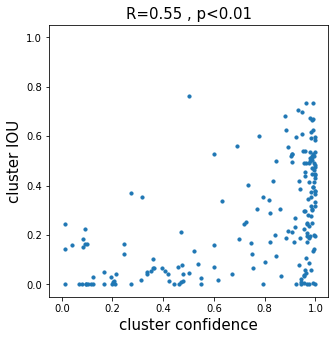

In [51]:
## plot IOU in function of confidence
import scipy.stats as stats

subdf = df[df['detected']].copy()

fig, axs = plt.subplots(1,1, figsize=(5,5))

plt.scatter(subdf['confidence'].values, subdf['IOU'].values, s=10)
plt.ylabel('cluster IOU', fontsize=15)
plt.xlabel('cluster confidence', fontsize=15)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

cor = stats.spearmanr(subdf['confidence'].values, subdf['IOU'].values)
if cor[1]<0.01:
    plt.title(f'R={round(cor[0],2)} , p<0.01', fontsize = 15)
else:
    plt.title(f'R={round(cor[0],2)} , p={round(cor[1],2)}', fontsize = 15)
print(cor)




